This project classifies customers based on their annual income, specifically, whether it exceeds 50,000 USD or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/adult.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.replace('?',np.nan,inplace=True)

In [ ]:
#Dropping all NULL values
data.dropna(inplace=True)

In [ ]:
data['income'].value_counts()

# y-variable income is imbalanced

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [ ]:
#Encoding the Categorical values to Numericals using LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

Labelenc_workclass = LabelEncoder() 
data['workclass'] = Labelenc_workclass.fit_transform(data['workclass'])

Labelenc_education = LabelEncoder() 
data['education'] = Labelenc_education.fit_transform(data['education'])

Labelenc_marital_status = LabelEncoder() 
data['marital-status'] = Labelenc_marital_status.fit_transform(data['marital-status']) 

Labelenc_occupation = LabelEncoder() 
data['occupation'] = Labelenc_occupation.fit_transform(data['occupation']) 

Labelenc_relationship = LabelEncoder() 
data['relationship'] = Labelenc_relationship.fit_transform(data['relationship']) 

Labelenc_race = LabelEncoder() 
data['race'] = Labelenc_race.fit_transform(data['race']) 

Labelenc_gender = LabelEncoder() 
data['gender'] = Labelenc_gender.fit_transform(data['gender']) 

Labelenc_native_country = LabelEncoder() 
data['native-country'] = Labelenc_native_country.fit_transform(data['native-country']) 

Labelenc_income = LabelEncoder() 
data['income'] = Labelenc_income.fit_transform(data['income']) 

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [ ]:
# feature variable X
X = data.drop(['income'],axis=1)
# response variable y
y = data['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)

**Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
clf_random = RandomForestClassifier(random_state=0)

In [ ]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=clf_random.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

# the predictive accuracy for Income<50K is low due to imbalance

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



In [ ]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm, index = ['<=50K', '>50K'], columns = ['<=50K', '>50K']) 

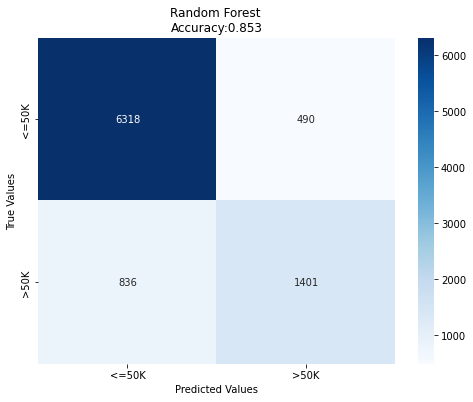

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

## Synthetic Minority Oversampling Technique (SMOTE) 
* A subset of the minority class data is taken, and a similar replica of the data is created, which is added to the main datasets. This method helps increase the model accuracy on imbalanced data. 

In [ ]:
import imblearn 
from imblearn.over_sampling import SMOTE 

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
clf_random.fit(X_resampled,y_resampled)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=clf_random.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6808
           1       0.67      0.68      0.68      2237

    accuracy                           0.84      9045
   macro avg       0.78      0.79      0.78      9045
weighted avg       0.84      0.84      0.84      9045



In [ ]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,\
            index = ['<=50K', '>50K'], \
            columns = ['<=50K', '>50K'])

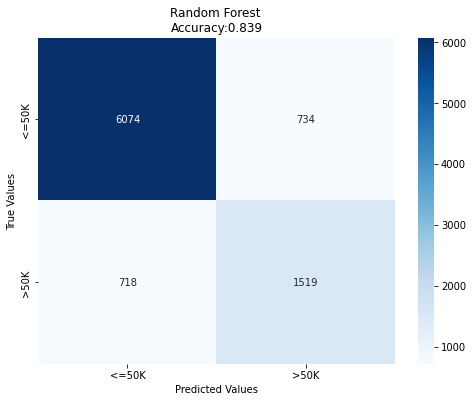

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

The sampling techniques (SMOTE) improved the model from 1401 to 1528 for identifying people who were earning more than 50,000 USD. 

In [ ]:
importances = clf_random.feature_importances_

In [ ]:
indices = np.argsort(importances)
Features = X.columns
Features

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

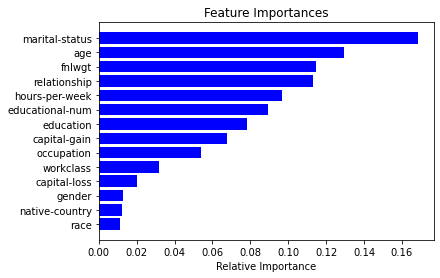

In [ ]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The above graph shows the feature importance. The marital-status feature is the most impactful for predicting if a customer makes over 50k on this dataset.